In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

### 1) Apply DBSCAN to the heart disease data by trying different values for eps and min_samples parameters. You'll realize that it's really hard to get a two cluster solution using DBSCAN if not impossible

In [5]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('SELECT * FROM heartdisease', con=engine)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       303 non-null    float64
 1   1       303 non-null    float64
 2   2       303 non-null    float64
 3   3       303 non-null    float64
 4   4       303 non-null    float64
 5   5       303 non-null    float64
 6   6       303 non-null    float64
 7   7       303 non-null    float64
 8   8       303 non-null    float64
 9   9       303 non-null    float64
 10  10      303 non-null    float64
 11  11      303 non-null    object 
 12  12      303 non-null    object 
 13  13      303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [6]:
# Define the features
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

# Standardize the data.
scaler = StandardScaler()
scaled = scaler.fit_transform(X)

eps = 1 and min_samples = 4


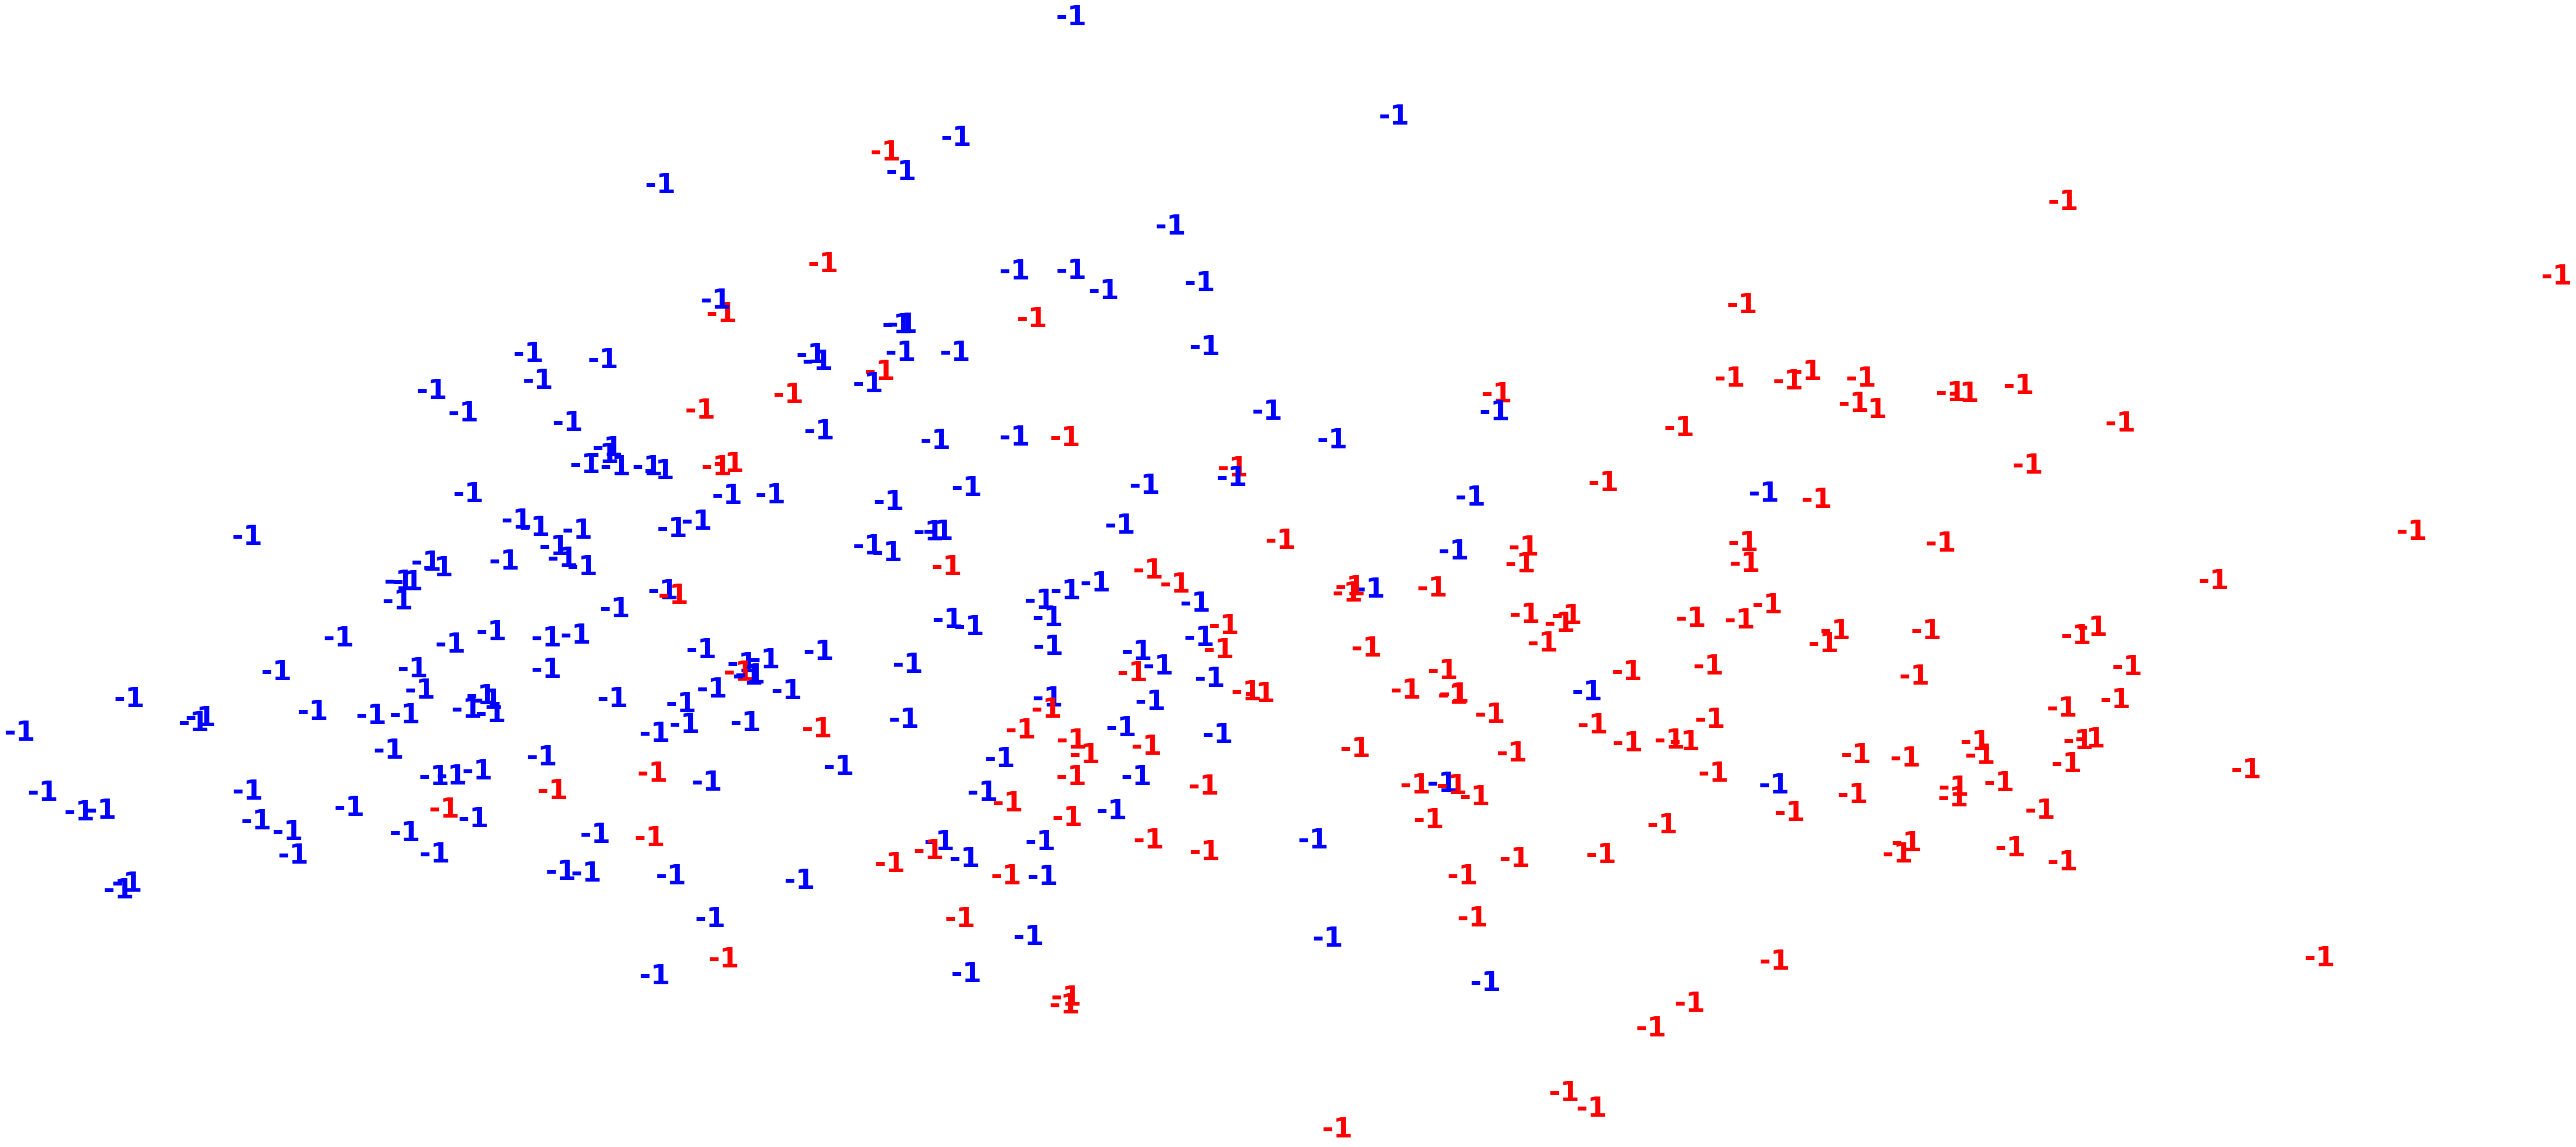

eps = 1 and min_samples = 5


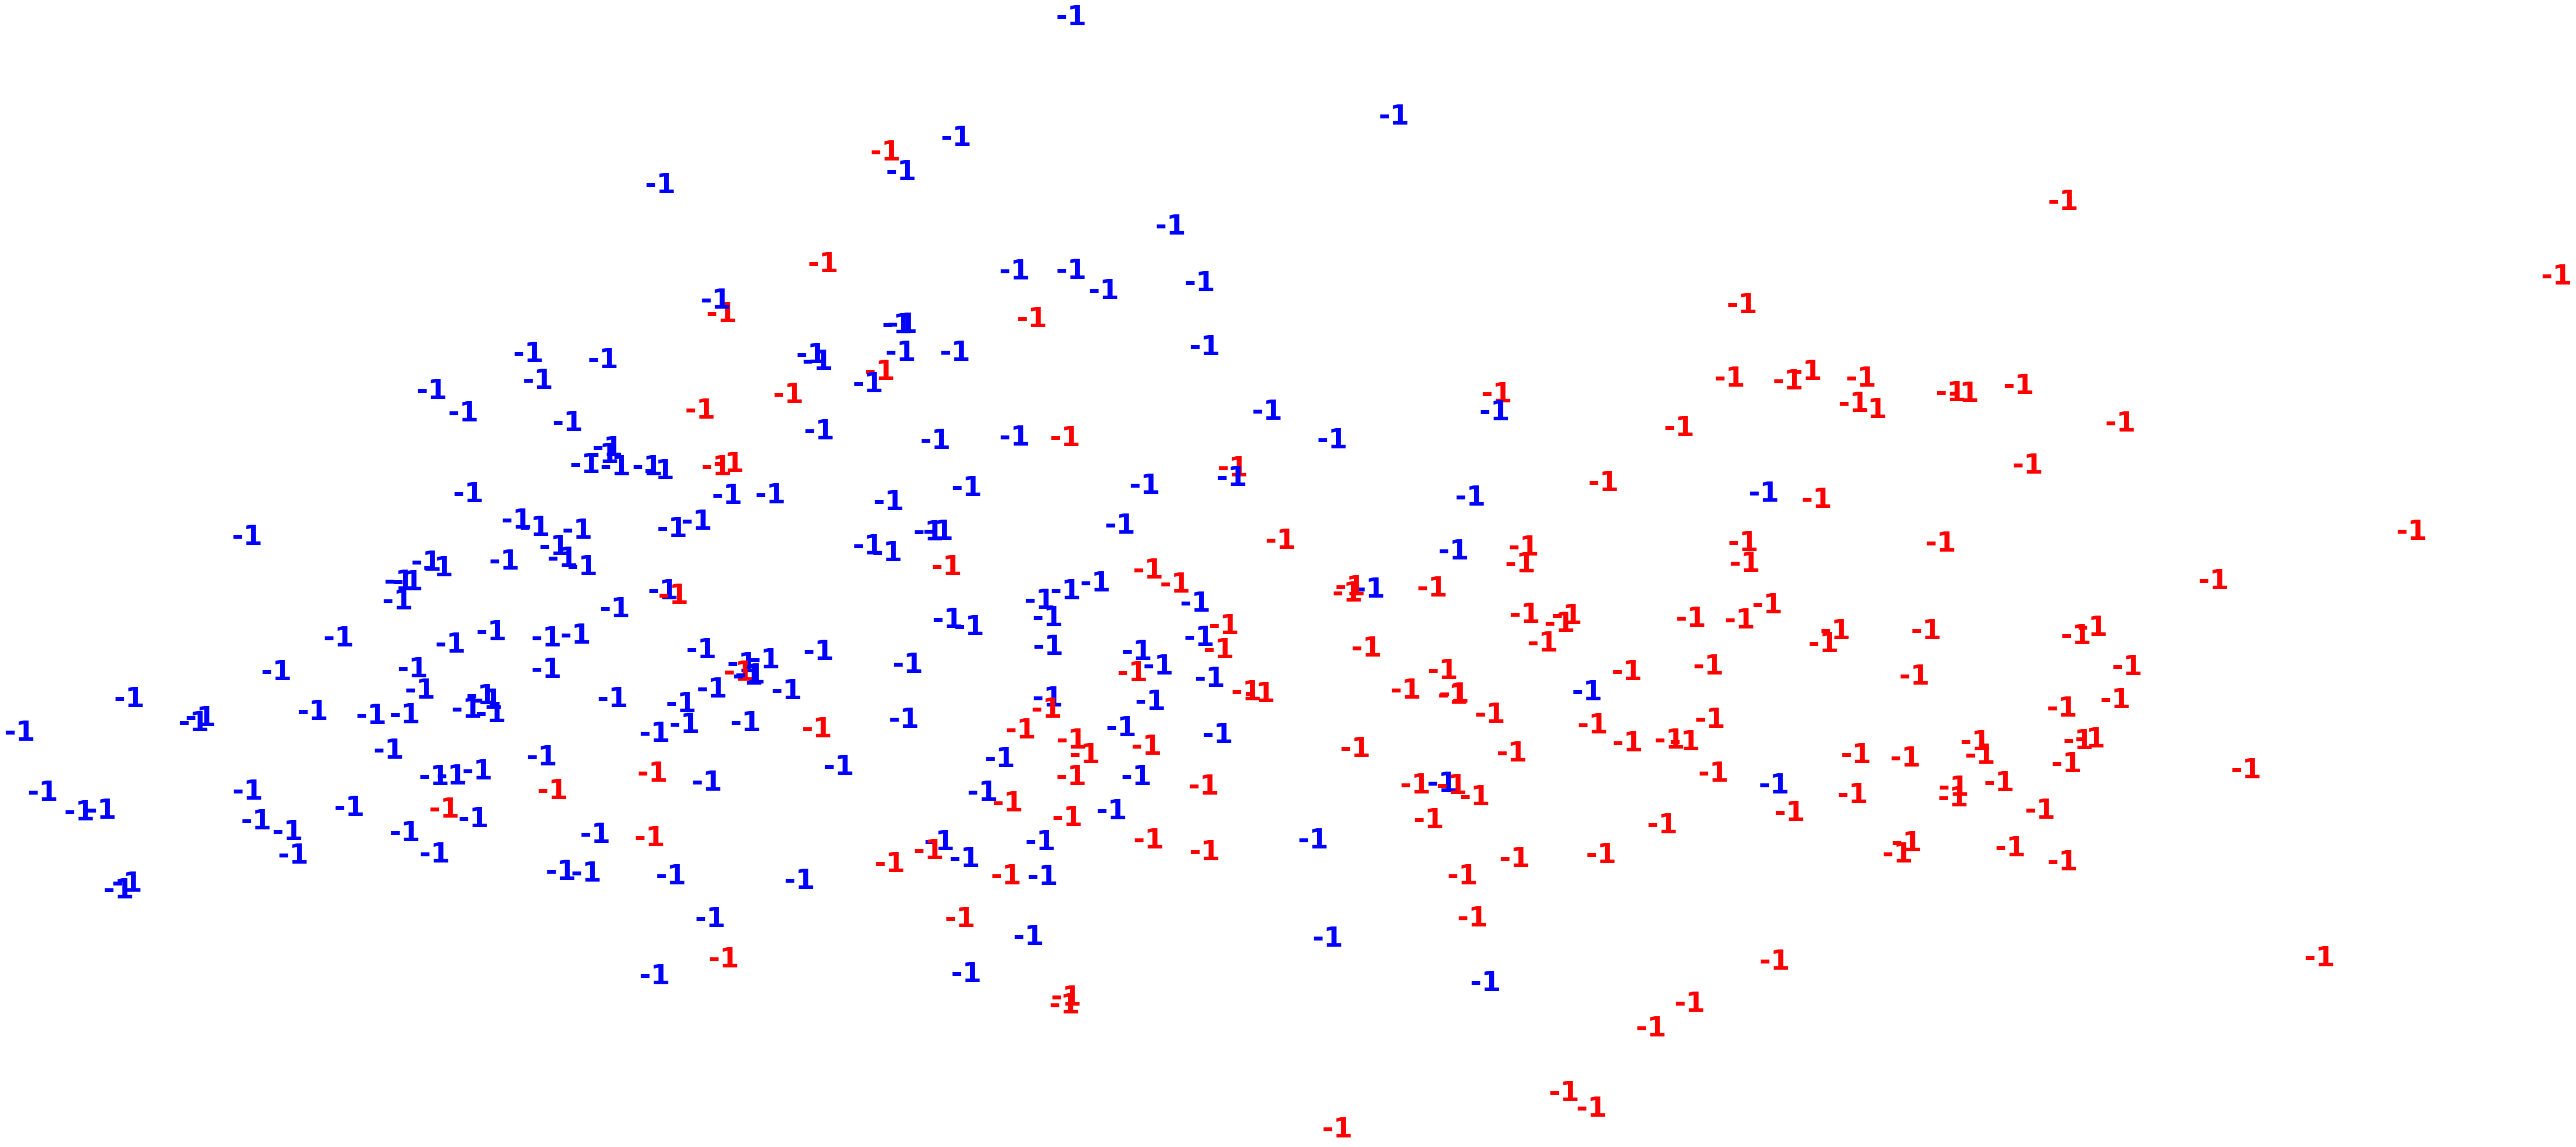

eps = 1 and min_samples = 6


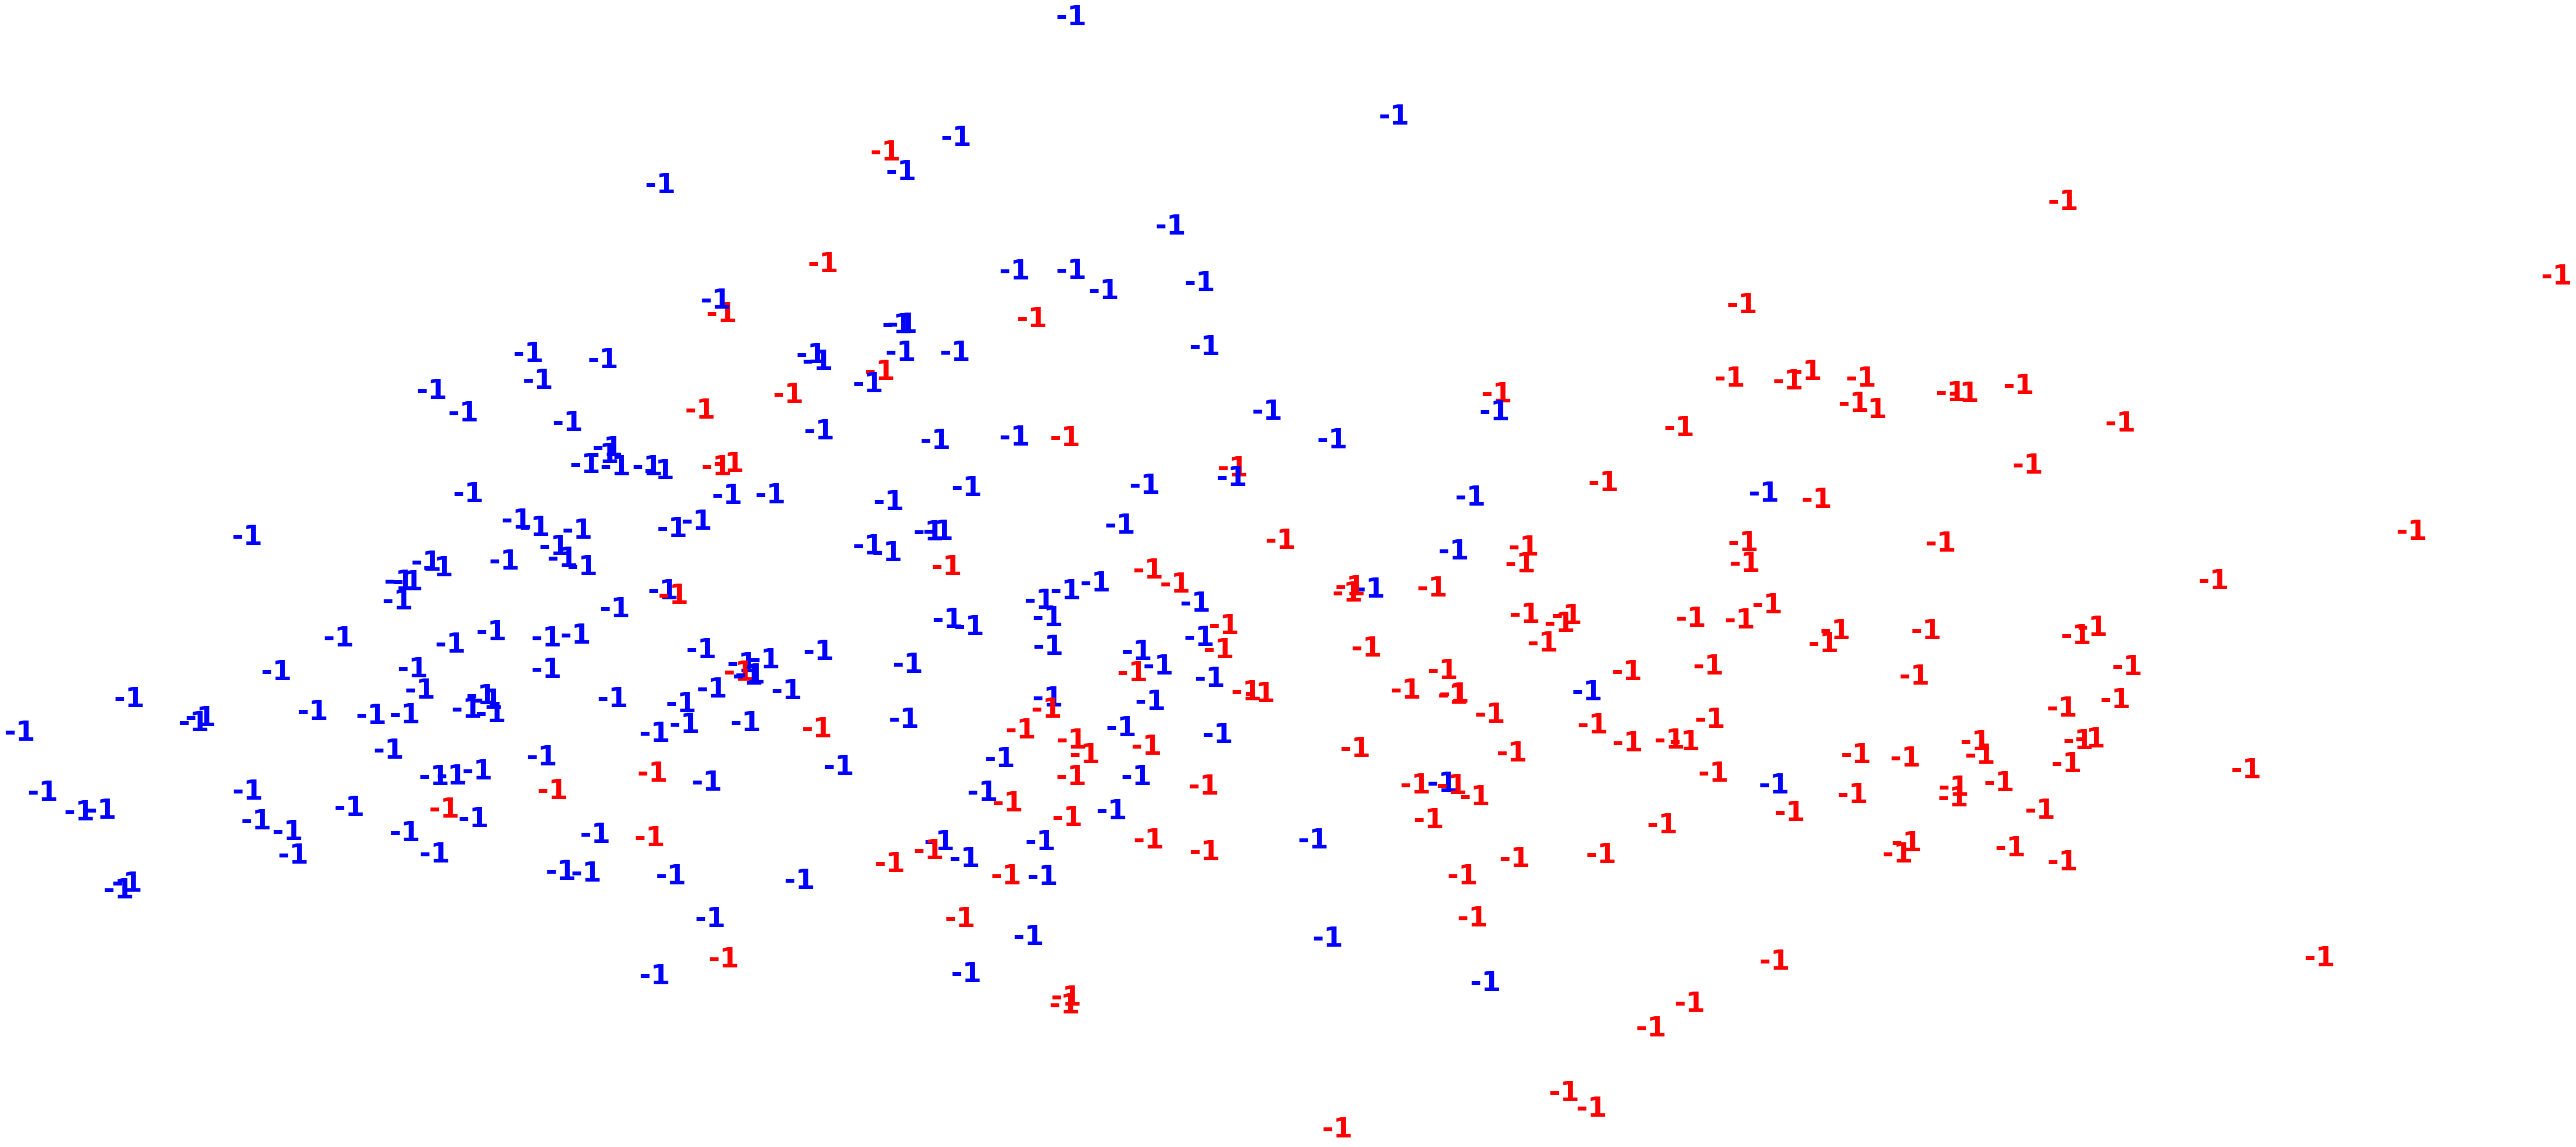

eps = 2 and min_samples = 4


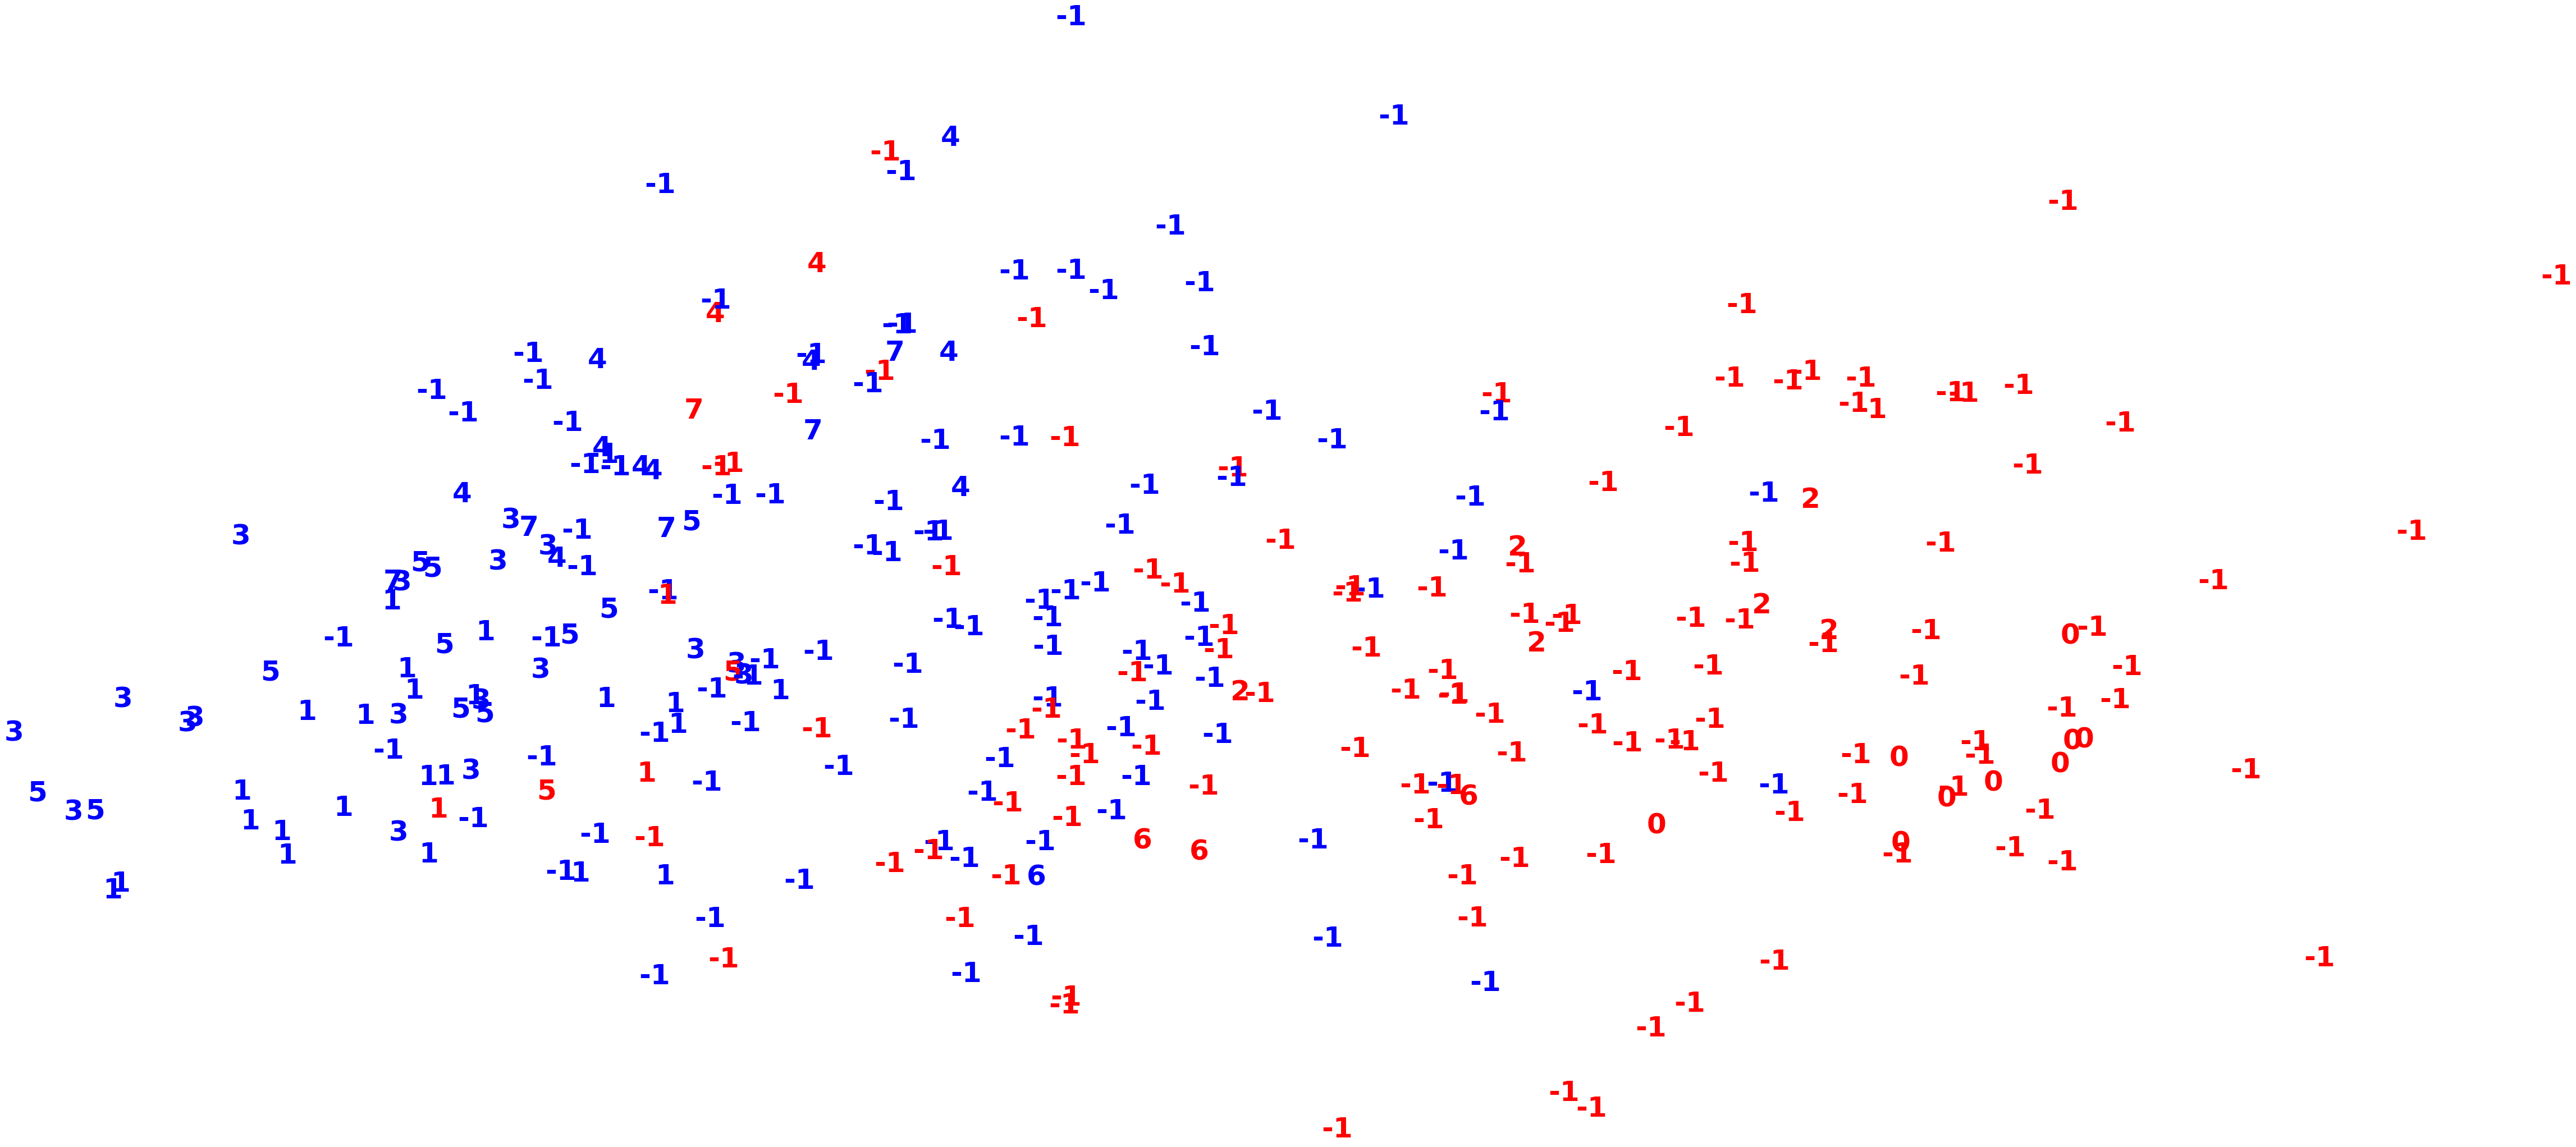

eps = 2 and min_samples = 5


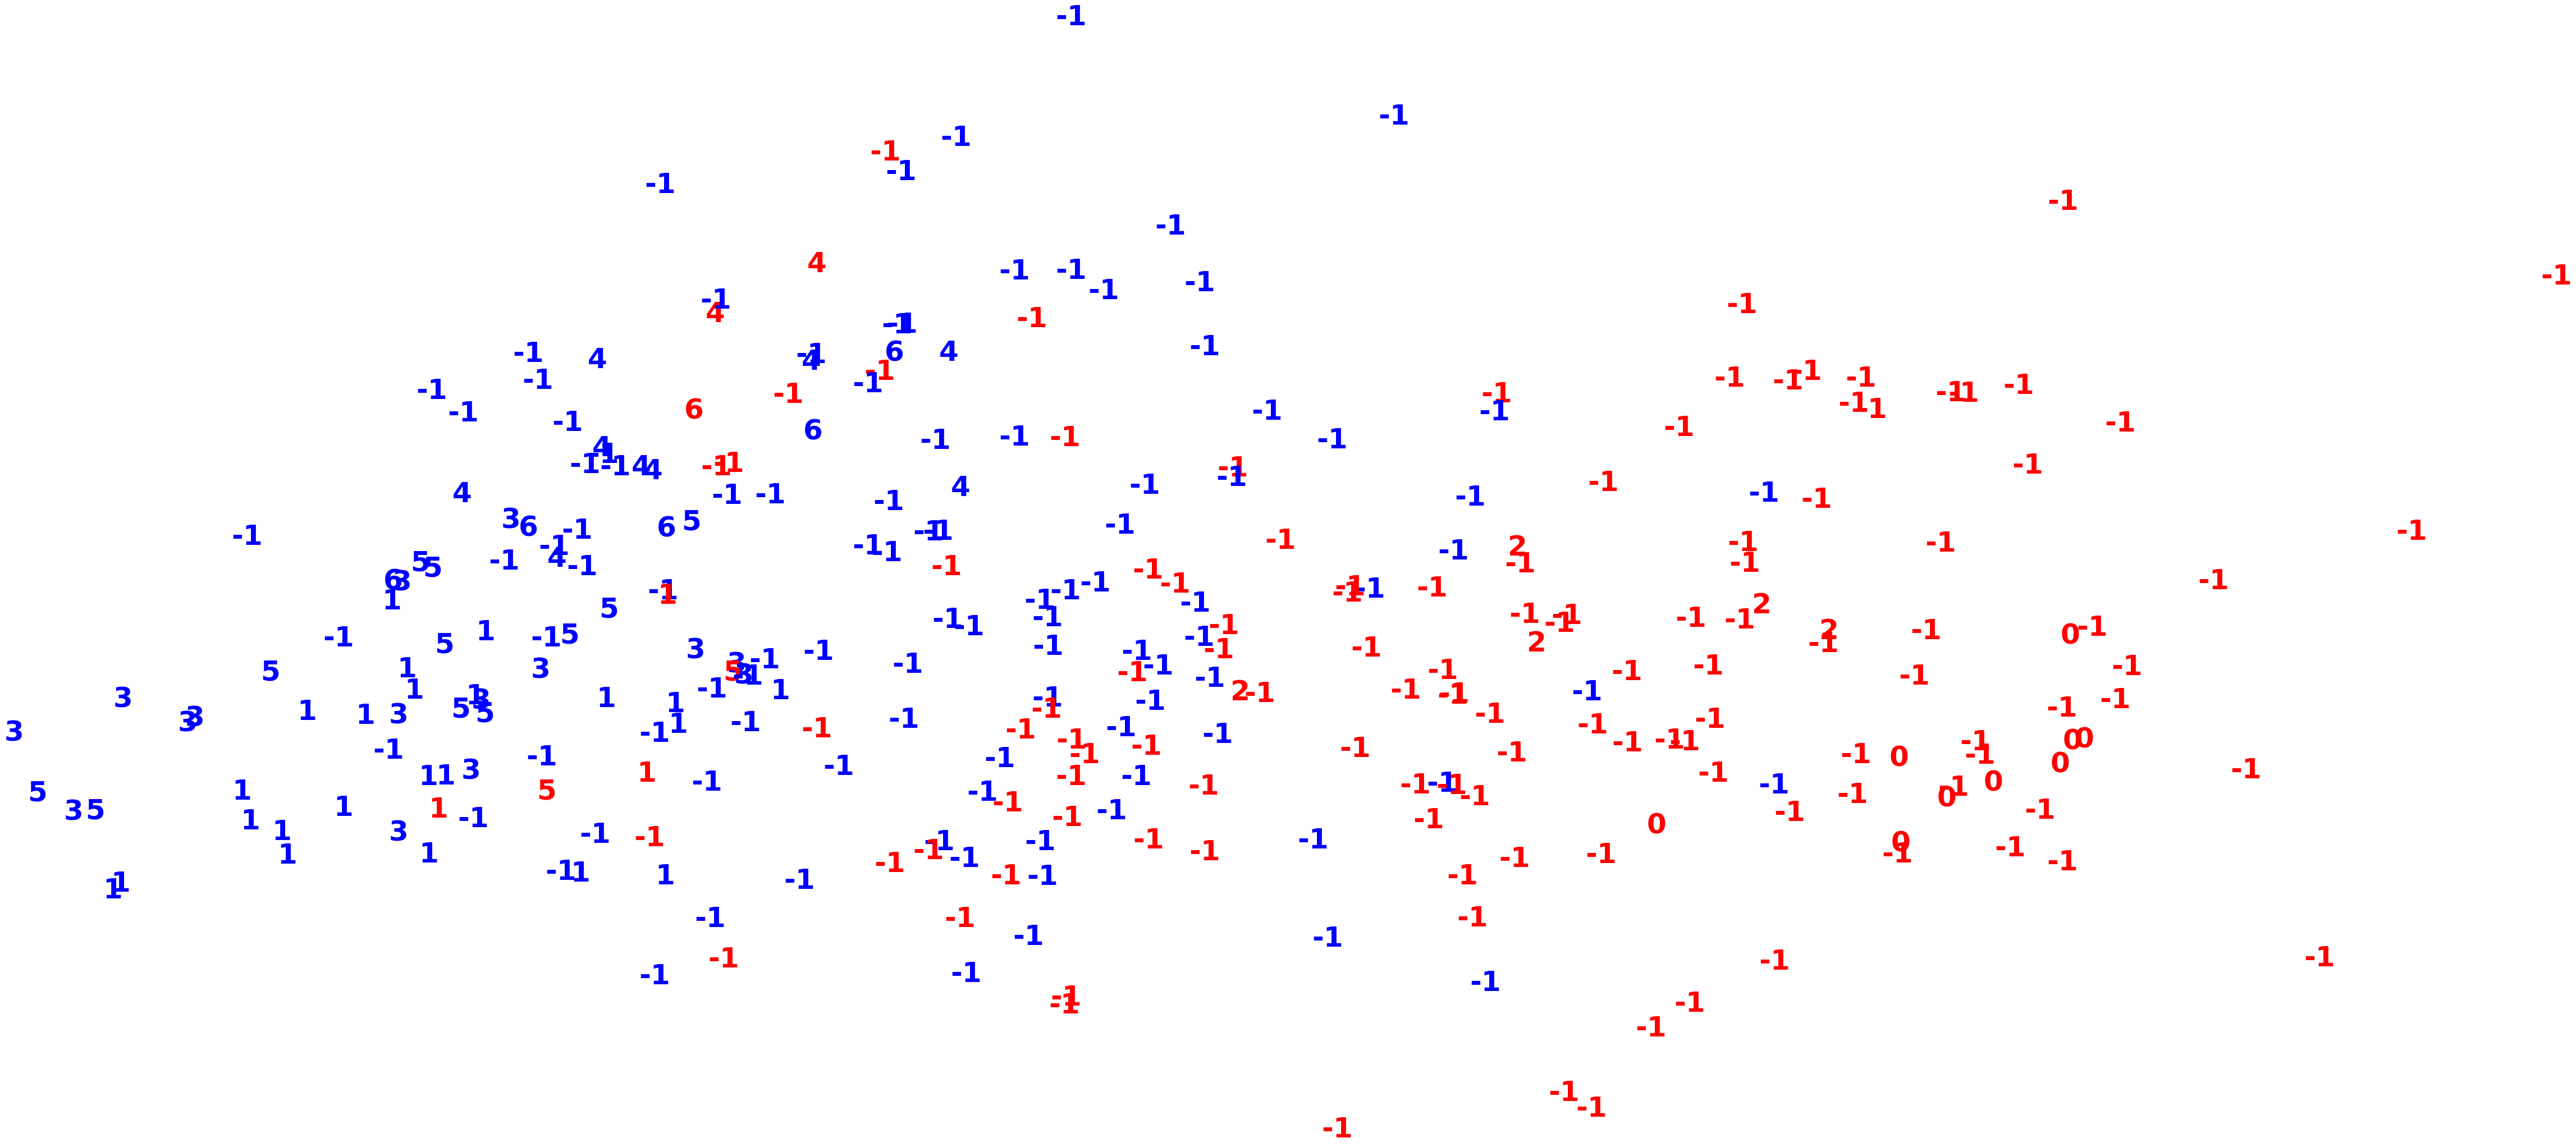

eps = 2 and min_samples = 6


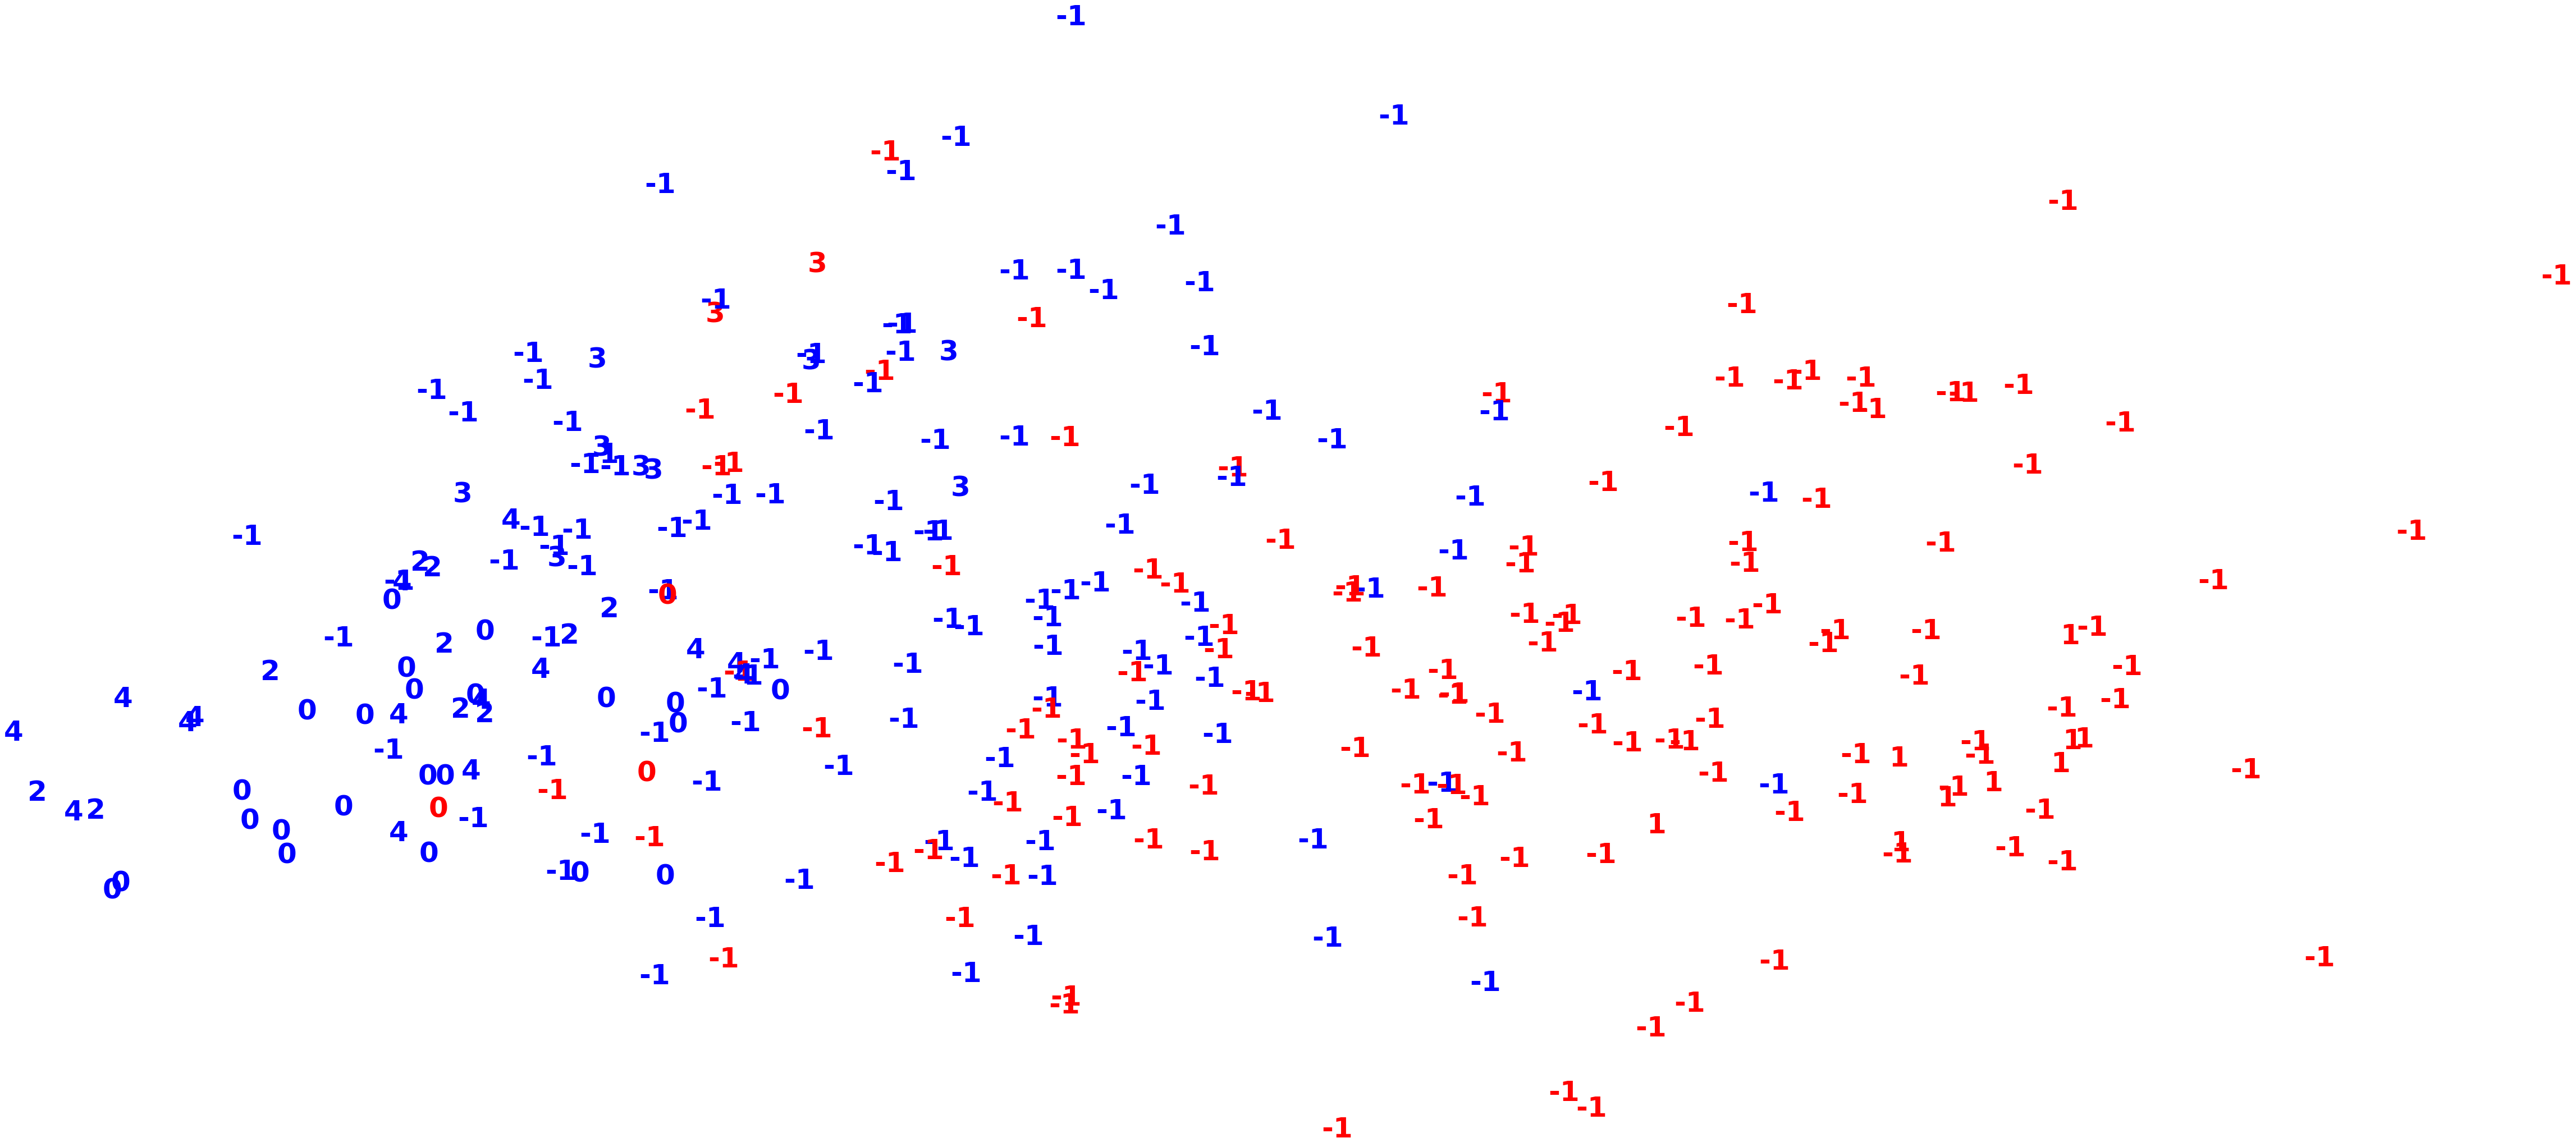

eps = 3 and min_samples = 4


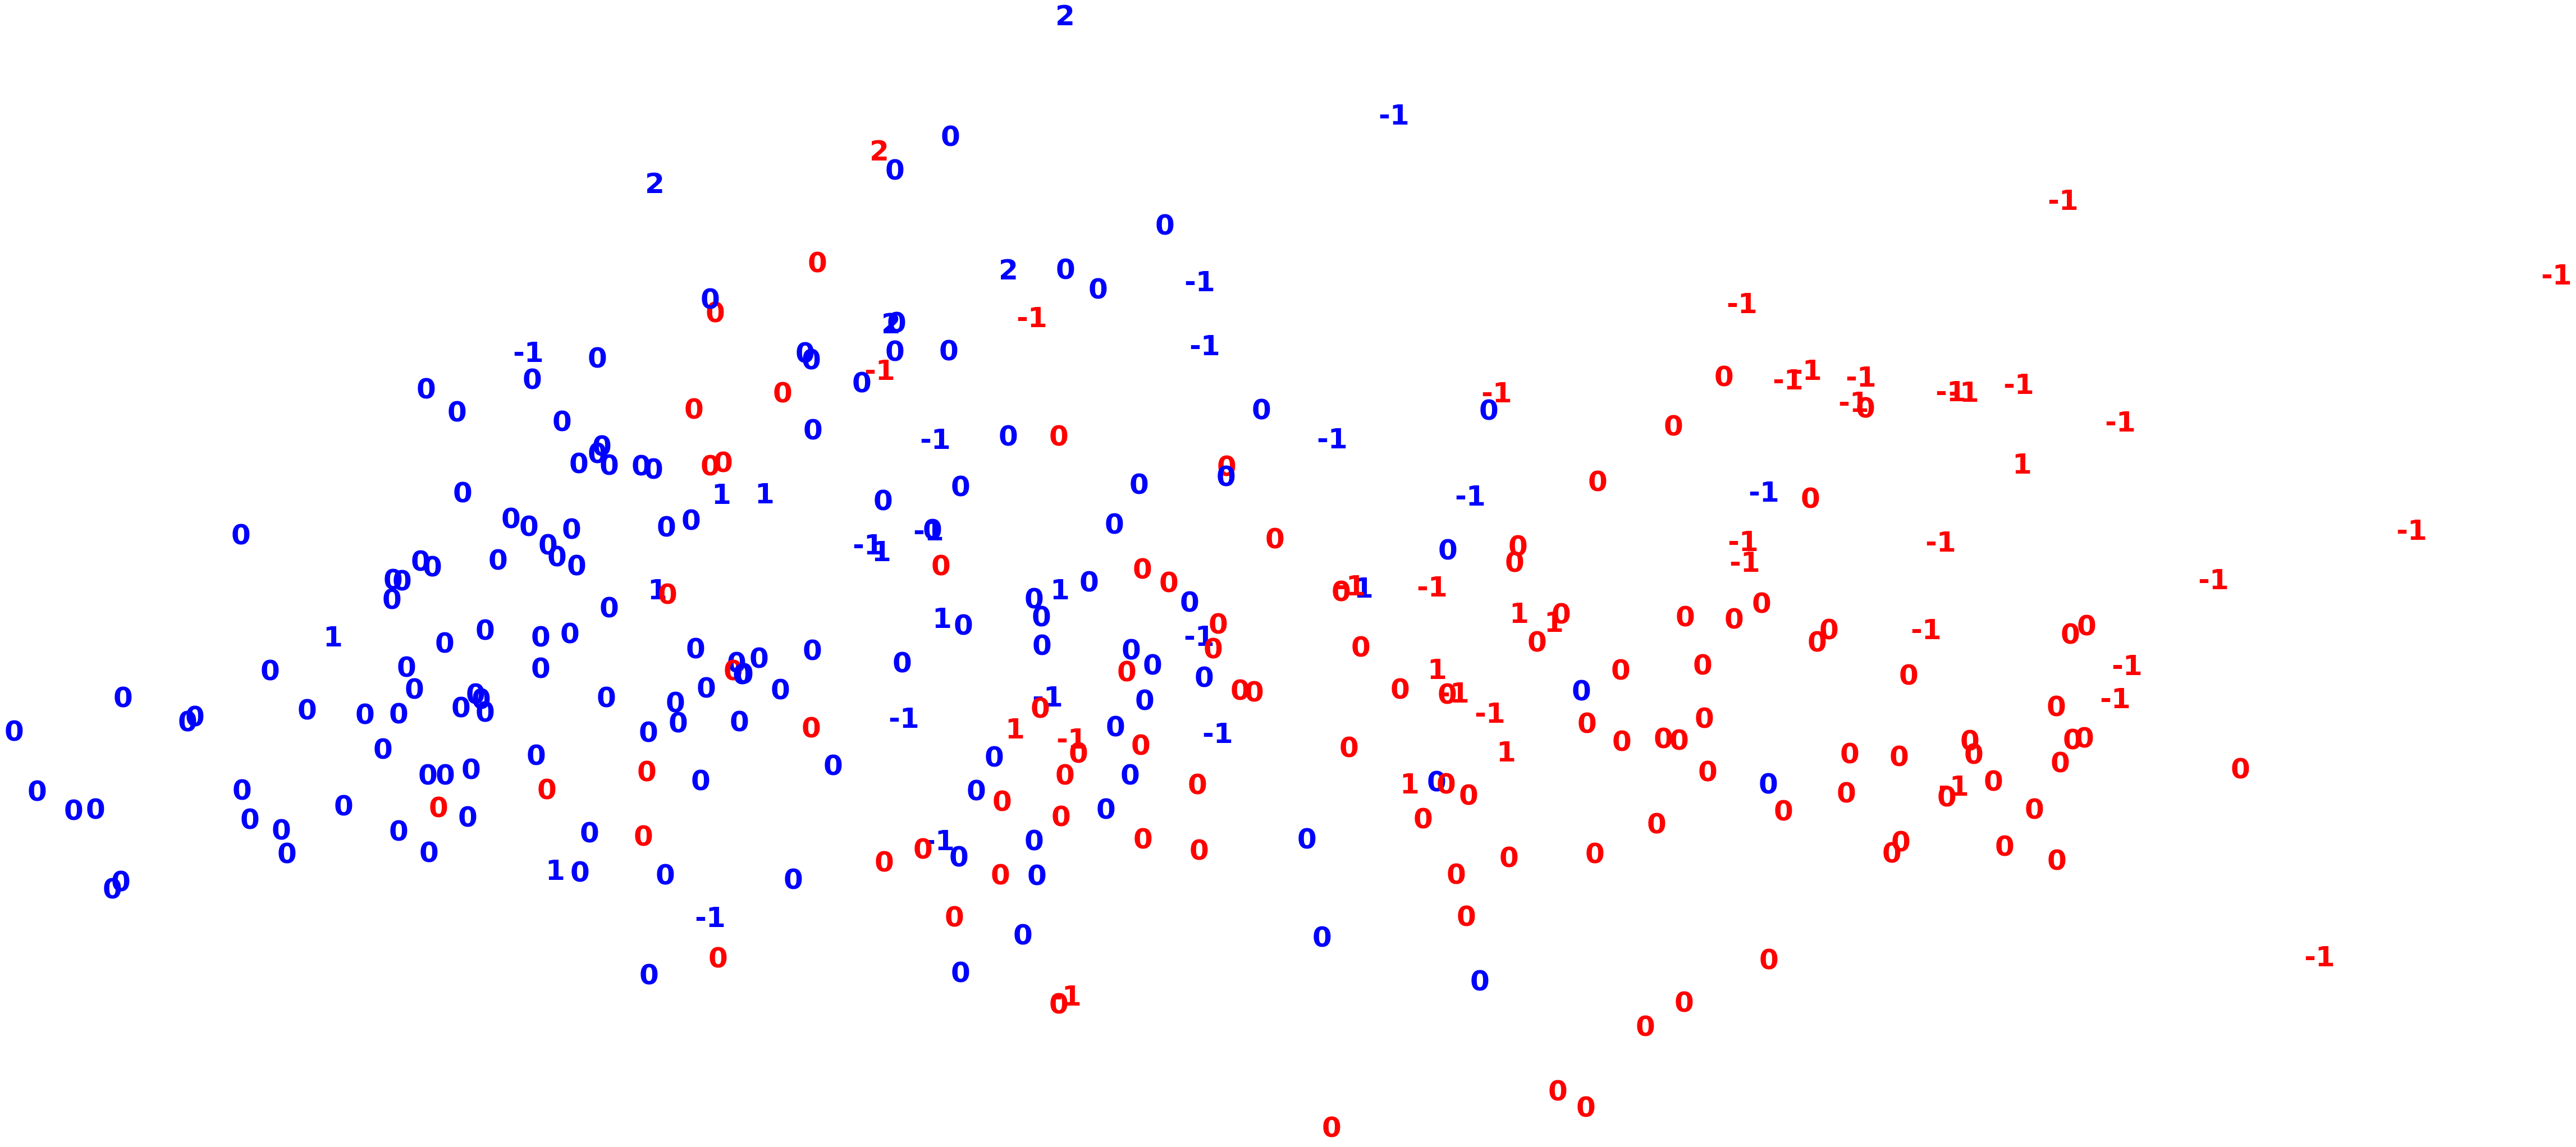

eps = 3 and min_samples = 5


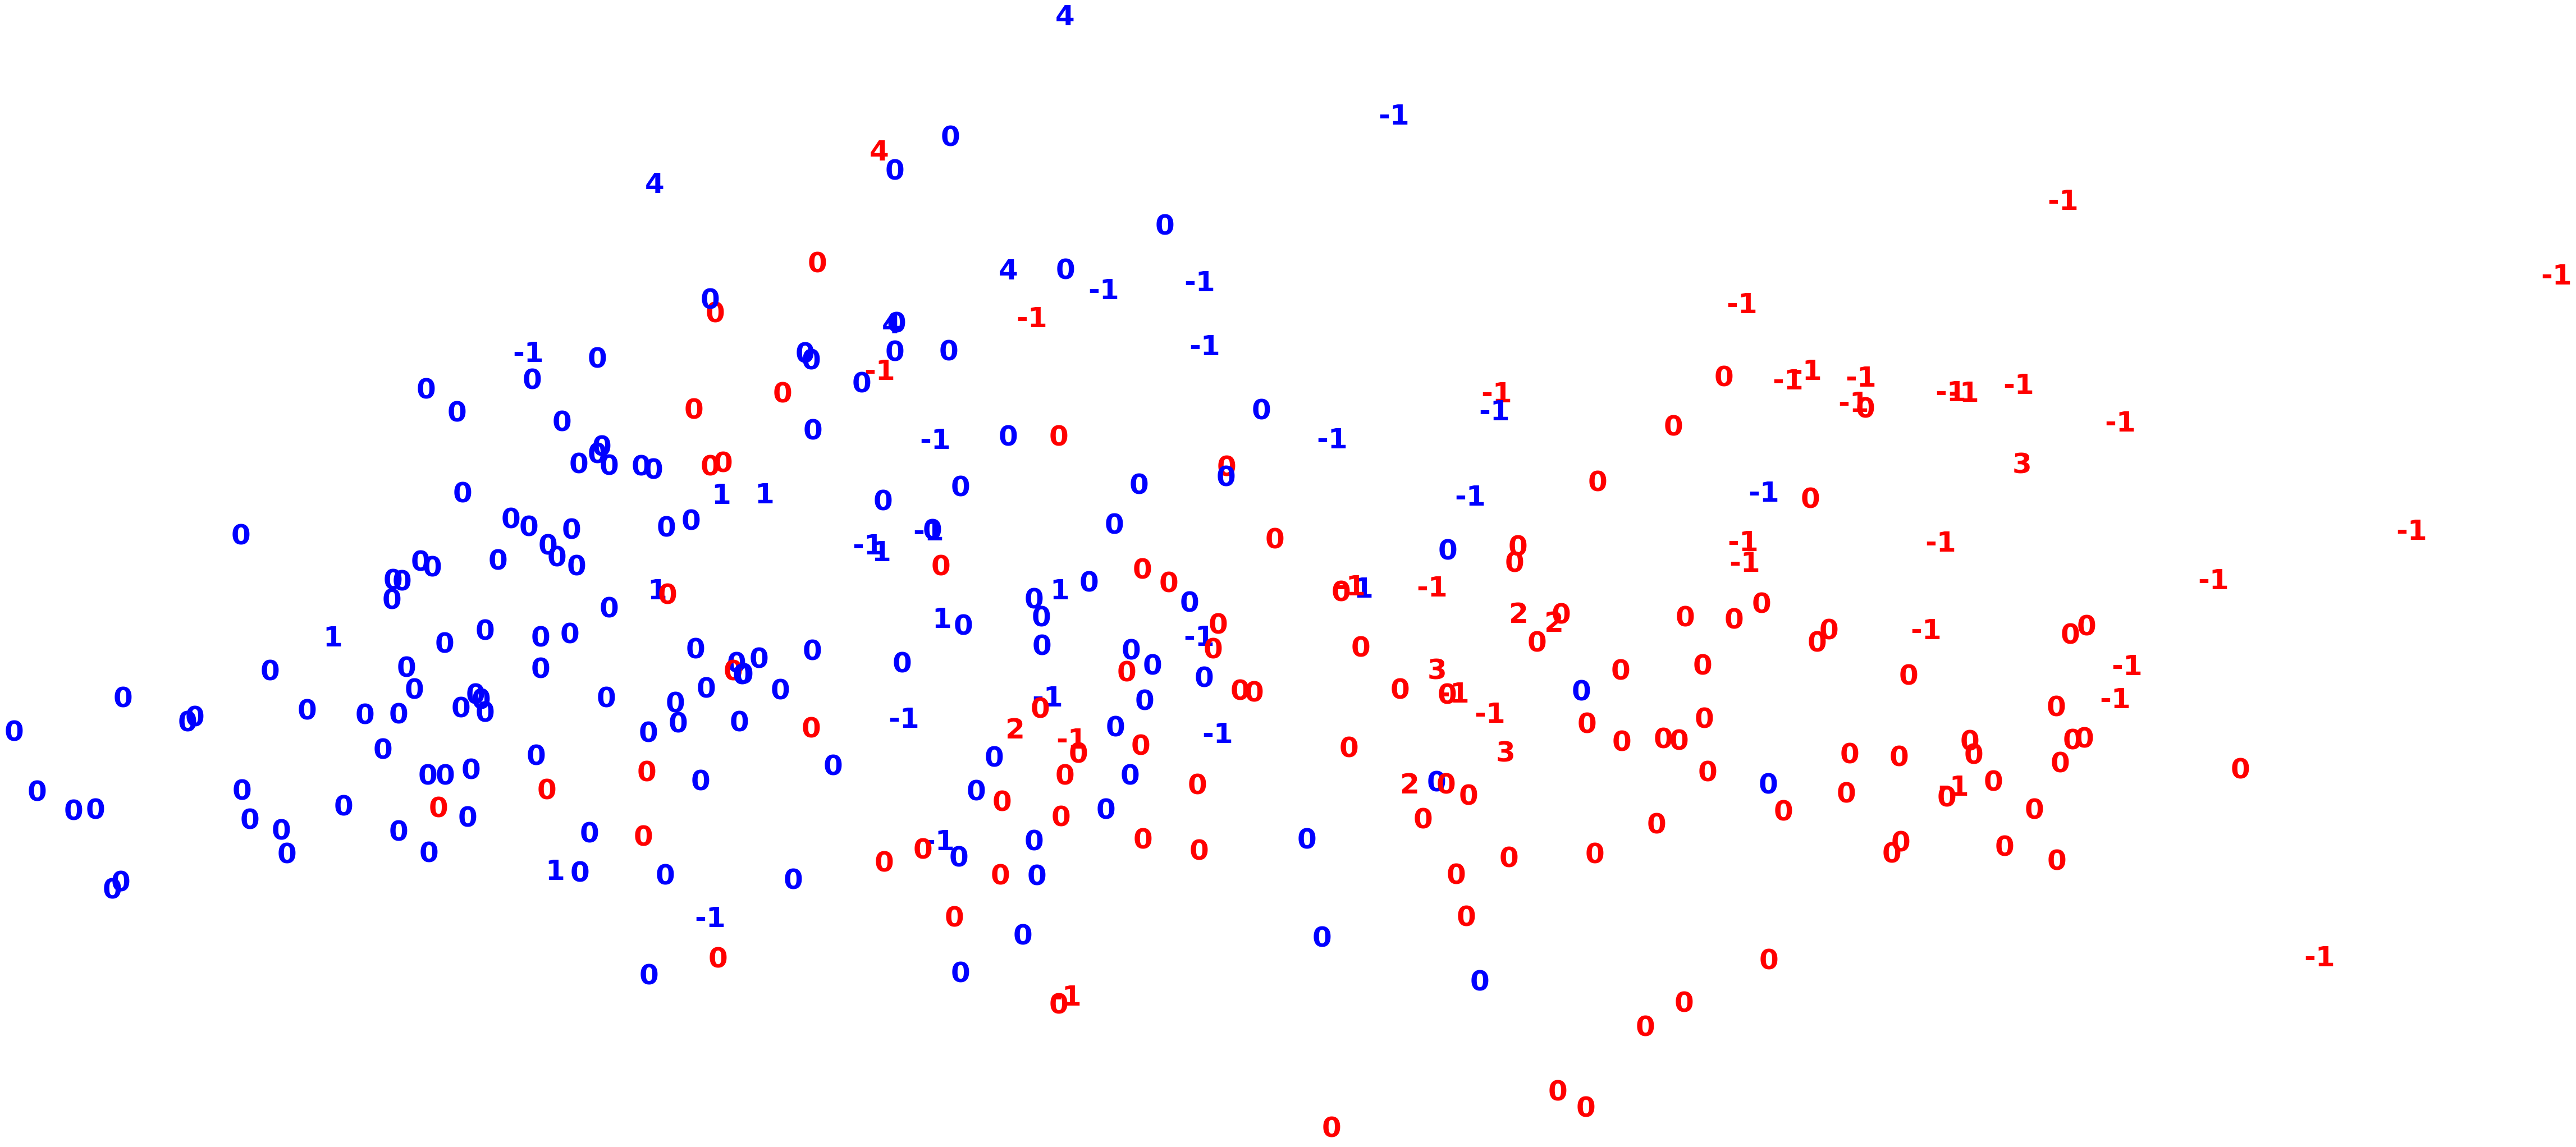

eps = 3 and min_samples = 6


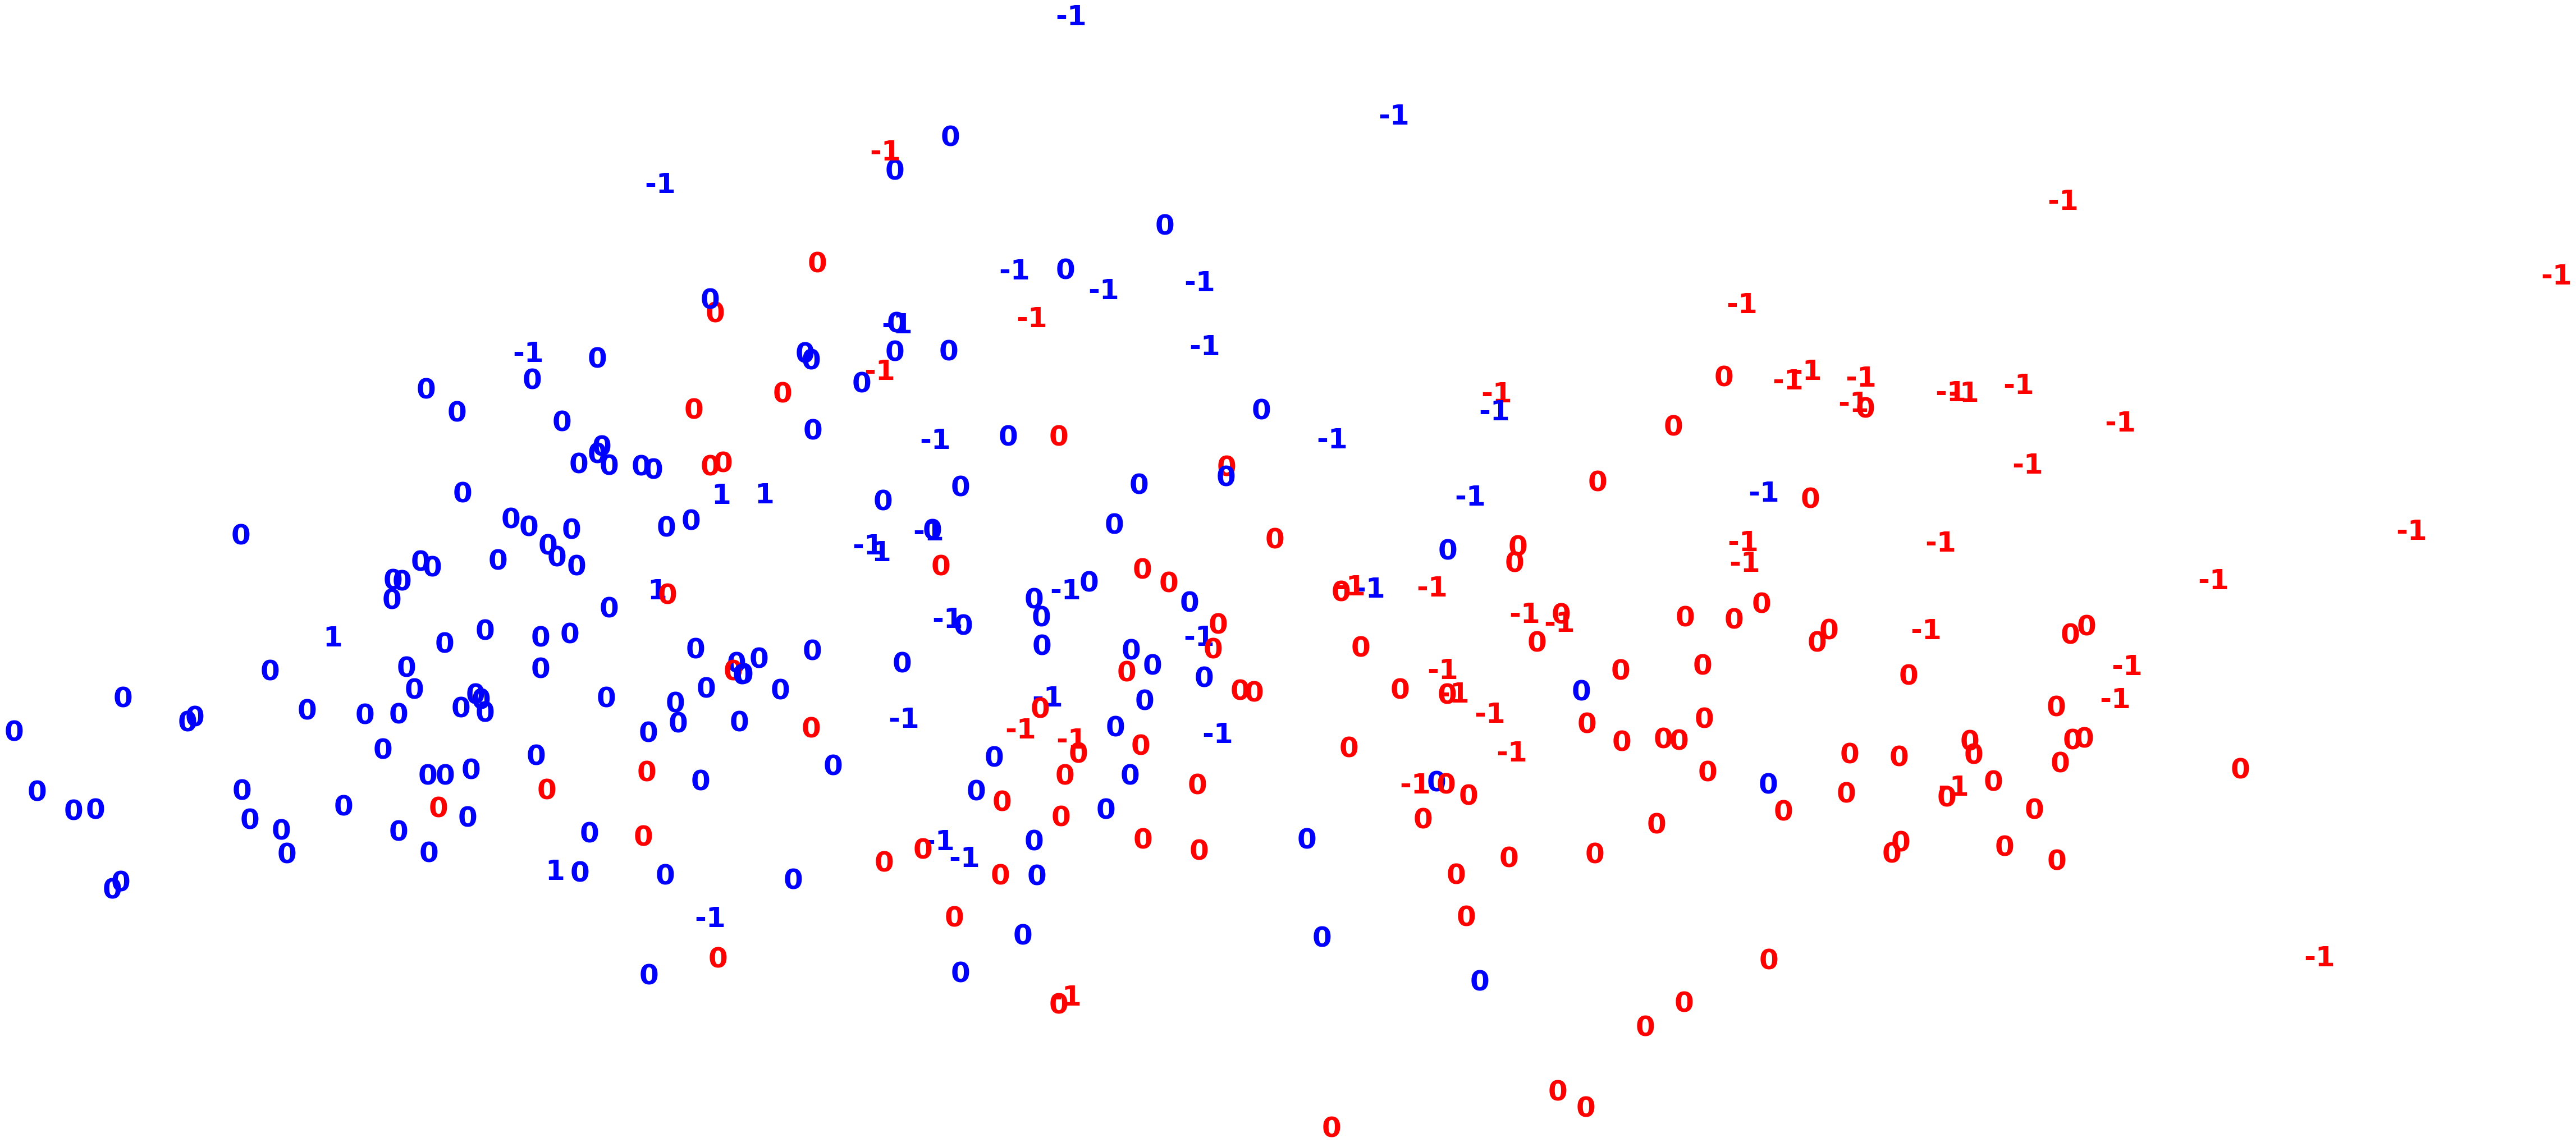

In [25]:
eps = [1,2,3]
min_samples = [4,5,6]
for ep in eps:
    for m in min_samples:
        print('eps = {} and min_samples = {}'.format(ep,m))
        plt.figure(figsize=(10,5))
        # Defining the agglomerative clustering
        dbscan_cluster = DBSCAN(eps=ep, min_samples=m)

        # Fit model
        clusters = dbscan_cluster.fit_predict(scaled)

        pca = PCA(n_components=2).fit_transform(scaled)


        colours = 'rbg'
        for i in range(pca.shape[0]):
            plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
                     color=colours[y[i]],
                     fontdict={'weight': 'bold', 'size': 50}
                )

        plt.xticks([])
        plt.yticks([])
        plt.axis('off')
        plt.show()

### 2) Apply DBSCAN by setting parameters eps=1, min_samples=1, metric="euclidean". Then, increase the value of min_samples. What's the effect of increasing min_samples on the number of clusters DBSCAN identifies?

In [34]:
min_samples = np.arange(1, 53, 2)
for m in min_samples:
    print('min_samples = {}'.format(m))
    # Defining the agglomerative clustering
    dbscan_cluster = DBSCAN(eps=1, min_samples=m, metric='euclidean')

    # Fit model
    clusters = dbscan_cluster.fit_predict(scaled)

    print("Number of clusters when min_samples={} is: {}".format(i, len(np.unique(clusters))))

min_samples = 1
Number of clusters when min_samples=302 is: 294
min_samples = 3
Number of clusters when min_samples=302 is: 2
min_samples = 5
Number of clusters when min_samples=302 is: 1
min_samples = 7
Number of clusters when min_samples=302 is: 1
min_samples = 9
Number of clusters when min_samples=302 is: 1
min_samples = 11
Number of clusters when min_samples=302 is: 1
min_samples = 13
Number of clusters when min_samples=302 is: 1
min_samples = 15
Number of clusters when min_samples=302 is: 1
min_samples = 17
Number of clusters when min_samples=302 is: 1
min_samples = 19
Number of clusters when min_samples=302 is: 1
min_samples = 21
Number of clusters when min_samples=302 is: 1
min_samples = 23
Number of clusters when min_samples=302 is: 1
min_samples = 25
Number of clusters when min_samples=302 is: 1
min_samples = 27
Number of clusters when min_samples=302 is: 1
min_samples = 29
Number of clusters when min_samples=302 is: 1
min_samples = 31
Number of clusters when min_samples=302 i

### 3) Apply DBSCAN by setting parameters eps=1, min_samples=1, metric="euclidean". Then, increase the value of eps. What's the effect of increasing eps on the number of clusters DBSCAN identifies?

In [36]:
eps = np.arange(1,53,2)
for ep in eps:
    print('min_samples = {}'.format(m))
    # Defining the agglomerative clustering
    dbscan_cluster = DBSCAN(eps=ep, min_samples=1, metric='euclidean')

    # Fit model
    clusters = dbscan_cluster.fit_predict(scaled)
    print("Number of clusters when min_samples={} is: {}".format(i, len(np.unique(clusters))))

min_samples = 51
Number of clusters when min_samples=302 is: 294
min_samples = 51
Number of clusters when min_samples=302 is: 34
min_samples = 51
Number of clusters when min_samples=302 is: 1
min_samples = 51
Number of clusters when min_samples=302 is: 1
min_samples = 51
Number of clusters when min_samples=302 is: 1
min_samples = 51
Number of clusters when min_samples=302 is: 1
min_samples = 51
Number of clusters when min_samples=302 is: 1
min_samples = 51
Number of clusters when min_samples=302 is: 1
min_samples = 51
Number of clusters when min_samples=302 is: 1
min_samples = 51
Number of clusters when min_samples=302 is: 1
min_samples = 51
Number of clusters when min_samples=302 is: 1
min_samples = 51
Number of clusters when min_samples=302 is: 1
min_samples = 51
Number of clusters when min_samples=302 is: 1
min_samples = 51
Number of clusters when min_samples=302 is: 1
min_samples = 51
Number of clusters when min_samples=302 is: 1
min_samples = 51
Number of clusters when min_samples